In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time as time
from scipy.sparse import spdiags

# **Exercise 2: Purely parabolic model problem**

### **Solution**

In [15]:
# Exact Solution
def exact_solution(x,t):
    return np.exp(-eps*t)*np.cos(x) + np.exp(-16*eps*t)*np.cos(4*x) + np.exp(-256*eps*t)*np.cos(16*x)

In [16]:
# Domain
a = -1
b = 1
eps = 0.1

# Mesh
N = 99
h = (b-a)/(N+1)
xi = np.arange(a,b+h,h)

# Stability Condition
# If we use a larger dt, the convergence breaks down
dt = .9*h**2/(2*eps)

# Temporal mesh
t_in, t_fin = 0, 1
t = np.arange(t_in, t_fin+dt, dt)
M = int(np.ceil((t_fin-t_in)/dt))

# Parameter
mu = eps * dt / h**2

# Initial Condition
u = exact_solution(xi, t[0])

# Store solution for every instant
u_sol = np.zeros((N+2, M))
u_sol[:,0] = u

# Intialize error
error = np.zeros((N+2, M))

# Dirichlet BC will be re‐imposed each step
for m in range(1,M):
    # left/right boundary from exact
    u[0] = exact_solution(a, t[m])
    u[-1] = exact_solution(b, t[m])
    

    # FTCS update on interior points
    u_new = u.copy()
    u_new[1:-1] = u[1:-1] + mu*(u[0:-2] - 2*u[1:-1] + u[2:])
    u = u_new
    u_sol[:,m] = u

    # Compute error
    u_exact = exact_solution(xi, t[m])
    error[:,m] = np.abs(u - u_exact)

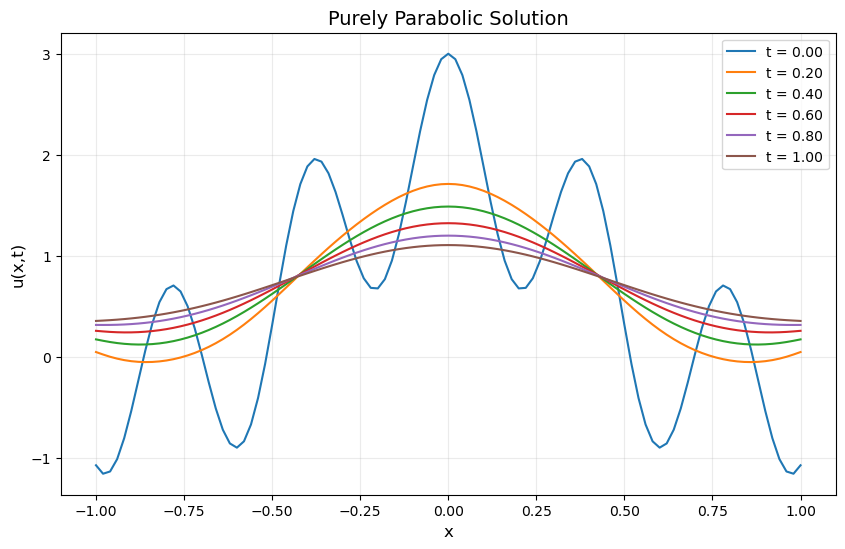

In [17]:
# Plot the approximate solution
plt.figure(figsize=(10, 6))
ax = plt.gca()
# for i in range(0,M,120):
#     ax.plot(xi,u_sol[:,i],label=f"t = {t[i]:.2f}")

ax.plot(xi,u_sol[:,0],label=f"t = {t[0]:.2f}")
ax.plot(xi,u_sol[:,len(t)//5],label=f"t = {t[len(t)//5]:.2f}")
ax.plot(xi,u_sol[:,2*len(t)//5],label=f"t = {t[2*len(t)//5]:.2f}")
ax.plot(xi,u_sol[:,3*len(t)//5],label=f"t = {t[3*len(t)//5]:.2f}")
ax.plot(xi,u_sol[:,4*len(t)//5],label=f"t = {t[4*len(t)//5]:.2f}")
ax.plot(xi,u_sol[:,-1],label=f"t = {t[-1]:.2f}")
ax.set_xlabel("x",fontsize=12)
ax.set_ylabel("u(x,t)",fontsize=12)
ax.set_title("Purely Parabolic Solution",fontsize=14)
plt.grid(alpha=.25)
plt.legend()
plt.show()

Adjusted shapes: xi: (101,), t_plot: (556,), u_sol: (101, 556)


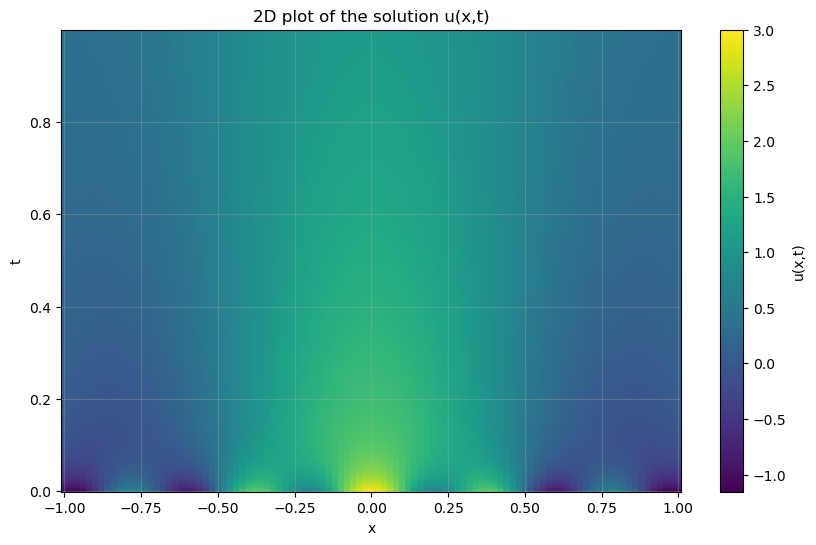

In [18]:
# Plot the approximate solution as a 2D heatmap
plt.figure(figsize=(10, 6))

# Fix the dimension mismatch - either trim t to match u_sol or use only the matching dimensions
# Option 1: Trim t to match u_sol
t_plot = t[:u_sol.shape[1]]  # Use only the first 556 time points
print(f"Adjusted shapes: xi: {xi.shape}, t_plot: {t_plot.shape}, u_sol: {u_sol.shape}")

# Create meshgrid with the corrected dimensions
X, T = np.meshgrid(xi, t_plot)

# Use pcolormesh for the plot
plt.pcolormesh(X, T, u_sol.T, shading='auto', cmap='viridis')
plt.colorbar(label='u(x,t)')
plt.xlabel("x")
plt.ylabel("t")
plt.title("2D plot of the solution u(x,t)")
plt.grid(alpha=.3)
plt.show()


**Animation**

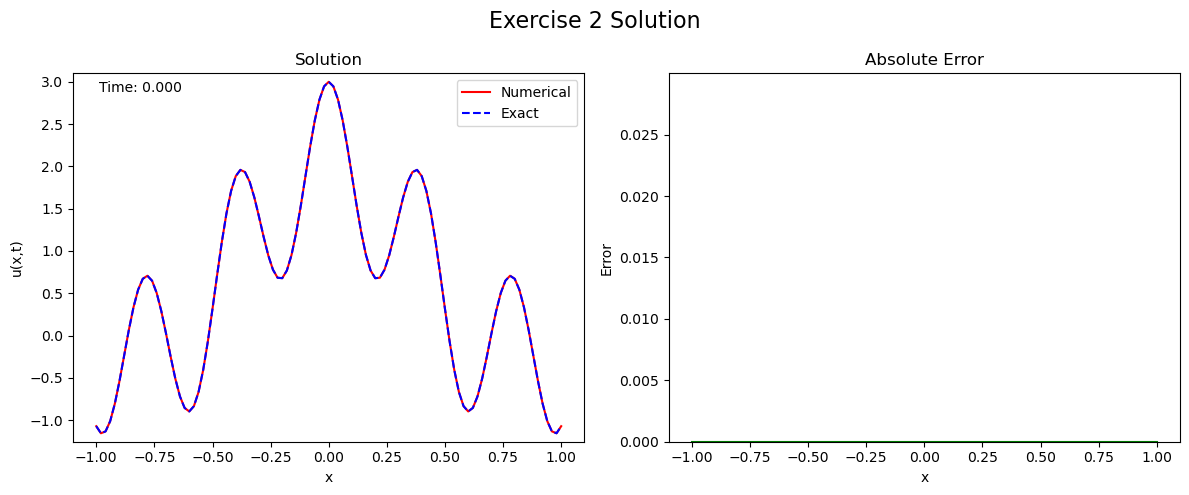

In [19]:
# Domain
a = -1
b = 1
eps = 0.1

# Mesh
N = 99
h = (b-a)/(N+1)
xi = np.arange(a,b+h,h)

# Stability Condition
dt = .9*h**2/(2*eps)

# Temporal mesh
t_in, t_fin = 0, 1
t = np.arange(t_in, t_fin+dt, dt)
M = int(np.ceil((t_fin-t_in)/dt))

# Parameter
mu = eps * dt / h**2

# Initial Condition
u = exact_solution(xi, t[0])

# Store solution for every instant
u_sol = np.zeros((N+2, M))
u_sol[:,0] = u

# Intialize error
error = np.zeros((N+2, M))

# Dirichlet BC will be re‐imposed each step
for m in range(1,M):
    # left/right boundary from exact
    u[0] = exact_solution(a, t[m])
    u[-1] = exact_solution(b, t[m])

    # FTCS update on interior points
    u_new = u.copy()
    u_new[1:-1] = u[1:-1] + mu*(u[0:-2] - 2*u[1:-1] + u[2:])
    u = u_new
    u_sol[:,m] = u

    # Compute error
    u_exact = exact_solution(xi, t[m])
    error[:,m] = np.abs(u - u_exact)

# Set up the figure and axis for animation
from matplotlib.animation import FuncAnimation
# plt.style.use('seaborn-v0_8-darkgrid')
plt.style.use('default')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Exercise 2 Solution', fontsize=16)

# Calculate min/max values for fixed y-axis limits
u_min = np.min(u_sol)
u_max = np.max(u_sol)
error_max = np.max(error)

# Plot initial condition
line1, = ax1.plot(xi, u, 'r-', label='Numerical')
line2, = ax1.plot(xi, u, 'b--', label='Exact')
ax1.set_xlabel('x')
ax1.set_ylabel('u(x,t)')
ax1.set_title('Solution')
ax1.set_ylim(u_min - 0.1, u_max + 0.1)  # Fixed y-axis limits with padding
ax1.legend()

# Plot initial error
line3, = ax2.plot(xi, np.zeros_like(xi), 'g-')
ax2.set_xlabel('x')
ax2.set_ylabel('Error')
ax2.set_title('Absolute Error')
ax2.set_ylim(0, error_max * 1.1)  # Fixed y-axis limits with padding

# Add a text annotation for time
time_text = ax1.text(0.05, 0.95, '', transform=ax1.transAxes)

# Animation update function
def update(frame):
    # Update solution plot
    line1.set_ydata(u_sol[:, frame])
    u_exact = exact_solution(xi, t[frame])
    line2.set_ydata(u_exact)
    
    # Update error plot
    line3.set_ydata(error[:, frame])
    
    # Update time text
    time_text.set_text(f'Time: {t[frame]:.3f}')
    
    return line1, line2, line3, time_text

# Create animation
ani = FuncAnimation(fig, update, frames=range(0, M, max(1, M//100)), 
                    interval=50, blit=True, repeat=False)

# Display the animation
plt.tight_layout()
plt.show()

# Optional: Save the animation
# ani.save('exercise2.gif', writer='pillow', fps=10)

### **Convergence Test**

In [20]:
def compute_solution_FTCS(N):
    h = (b - a) / (N + 1)
    xi = np.linspace(a, b, N + 2)
    dt = 0.5 * h**2 / (2 * eps)
    t0, t1 = 0, 1
    M = int(np.ceil((t1 - t0) / dt))
    t = np.linspace(t0, t1, M + 1)
    mu = eps * dt / h**2

    u = exact_solution(xi, t[0])
    for m in range(M):
        u[0] = exact_solution(a, t[m])
        u[-1] = exact_solution(b, t[m])
        u_new = u.copy()
        u_new[1:-1] = u[1:-1] + mu * (u[0:-2] - 2*u[1:-1] + u[2:])
        u = u_new

    # Obtain solution and error at T = 1
    u_exact = exact_solution(xi, t[-1])
    error = np.max(np.abs(u - u_exact))

    return error




           h        error     rate
--------------------------------
  2.0000e-01   1.7985e-02        -
  4.0000e-02   6.5171e-04     2.06
  2.0000e-02   1.6243e-04     2.00
  1.0000e-02   4.0576e-05     2.00
  5.0000e-03   1.0142e-05     2.00
  3.3333e-03   4.5074e-06     2.00


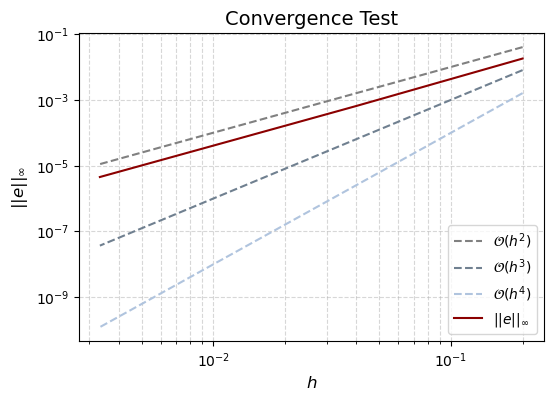

In [22]:
# Try multiple grid sizes
N_values = [9,49, 99, 199, 399,599]
h_values = [(b-a)/(N+1) for N in N_values]
errors = []
convergence_rates = ['-']   # First entry has no rate

for N in N_values:
    err = compute_solution_FTCS(N)
    errors.append(err)

# Calculate convergence rates
for i in range(1, len(errors)):
    # Convergence rate = log(error_ratio)/log(h_ratio)
    error_ratio = errors[i-1]/errors[i]
    h_ratio = h_values[i-1]/h_values[i]
    rate = np.log(error_ratio)/np.log(h_ratio)
    convergence_rates.append(f"{rate:.2f}")

# Print a simple table
print(f"{'h':>12s} {'error':>12s} {'rate':>8s}")
print("-"*32)
for i in range(len(N_values)):
    print(f"{h_values[i]:12.4e} {errors[i]:12.4e} {convergence_rates[i]:>8s}")

# Plotting h vs errors in log-log scale to visualize the convergence rate
plt.style.use('default')
plt.figure(figsize=(6, 4))
plt.loglog(h_values, [h**2 for h in h_values], linestyle='--', label=r'$\mathcal{O}(h^2)$',color='grey')
plt.loglog(h_values, [h**3 for h in h_values], linestyle='--', label=r'$\mathcal{O}(h^3)$',color='slategray')
plt.loglog(h_values, [h**4 for h in h_values], linestyle='--', label=r'$\mathcal{O}(h^4)$',color='lightsteelblue')
plt.loglog(h_values, errors, linestyle='-', label=r'$||e||_{\infty}$',color='darkred')

# Labels and legend
plt.xlabel(r'$h$',fontsize=12)
plt.ylabel(r'$||e||_{\infty}$',fontsize=12)
plt.title('Convergence Test',fontsize=14)
plt.legend()
plt.grid(True, which="both", ls="--",alpha=.5)

# Show plot
plt.show()